# BI Project
## Heart Forecast – Using Machine Learning Models to Predict Cardiovascular Events

In this notebook, we will explore the Framingham Heart Study dataset, which contains various cardiovascular risk factors collected from participants over a period of time. The goal of these visualizations is to understand the distribution of key risk factors and how they may relate to the 10-year risk of developing coronary heart disease.

**Variable description:**

* male: Gender of the patient (1 = male; 0 = female).
* age: Age of the patient.
* education: Education level (1-4, where 1 is the lowest and 4 is the highest).
* currentSmoker: Whether the patient is a current smoker (1 = yes; 0 = no).
* cigsPerDay: Number of cigarettes smoked per day.
* BPMeds: Whether the patient is on blood pressure medication (1 = yes; 0 = no).
* prevalentStroke: Whether the patient has previously had a stroke (1 = yes; 0 = no).
* prevalentHyp: Whether the patient has hypertension (1 = yes; 0 = no).
* diabetes: Whether the patient has diabetes (1 = yes; 0 = no).
* totChol: Total cholesterol level.
* sysBP: Systolic blood pressure.
* diaBP: Diastolic blood pressure.
* BMI: Body mass index.
* heartRate: Heart rate.
* glucose: Glucose level.
* TenYearCHD: 10-year risk of coronary heart disease (1 = yes; 0 = no).

# Data Overview

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


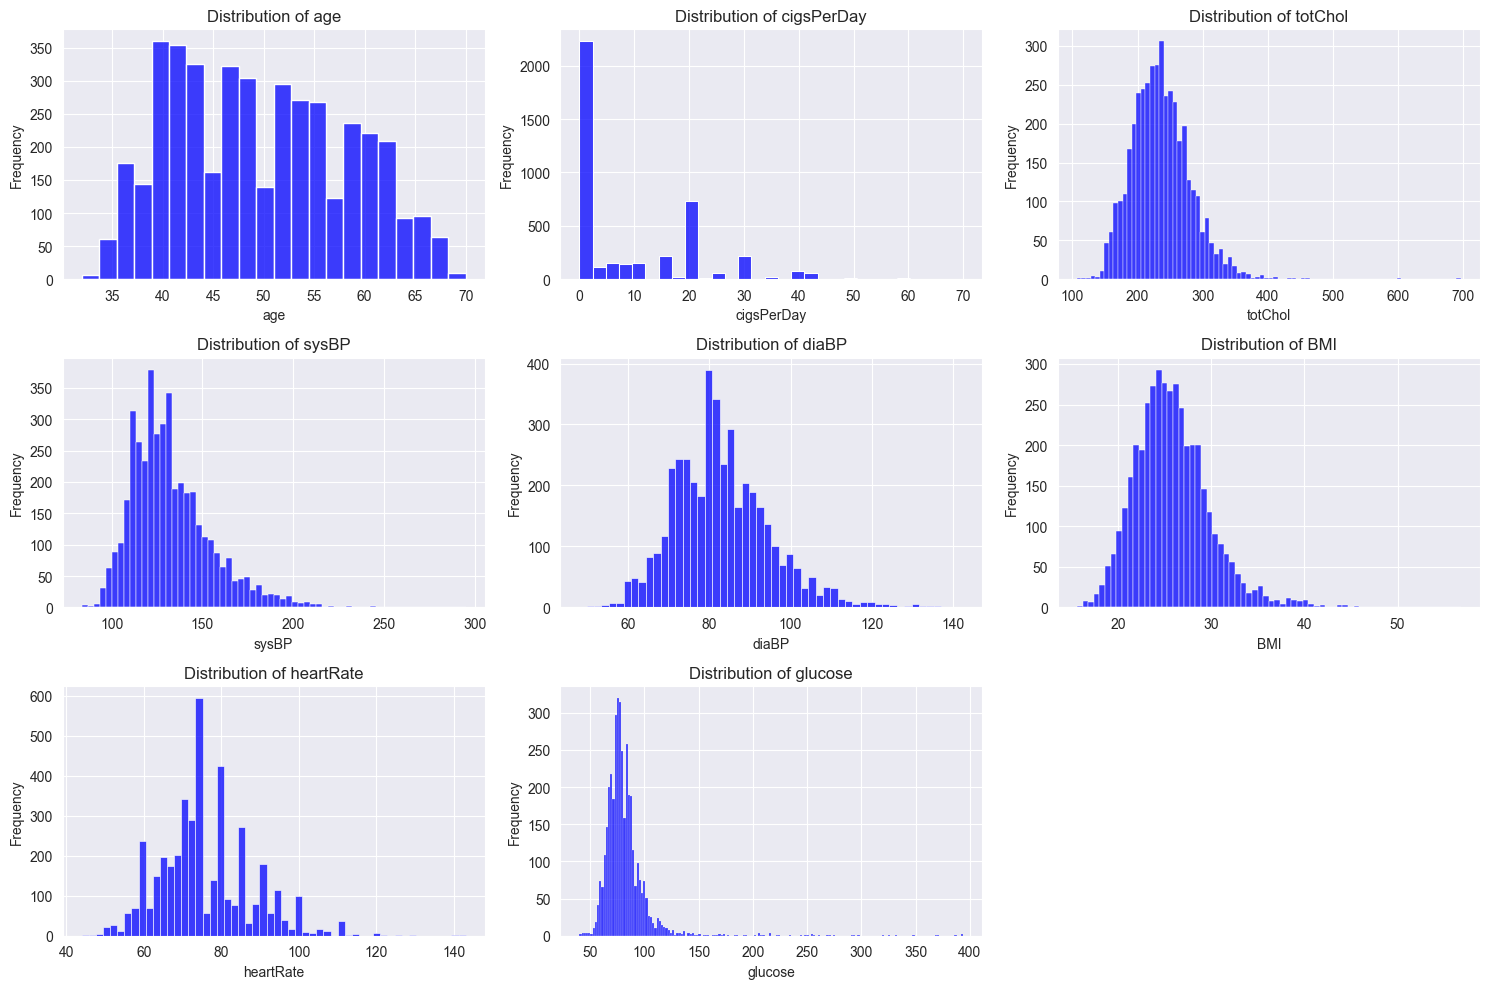

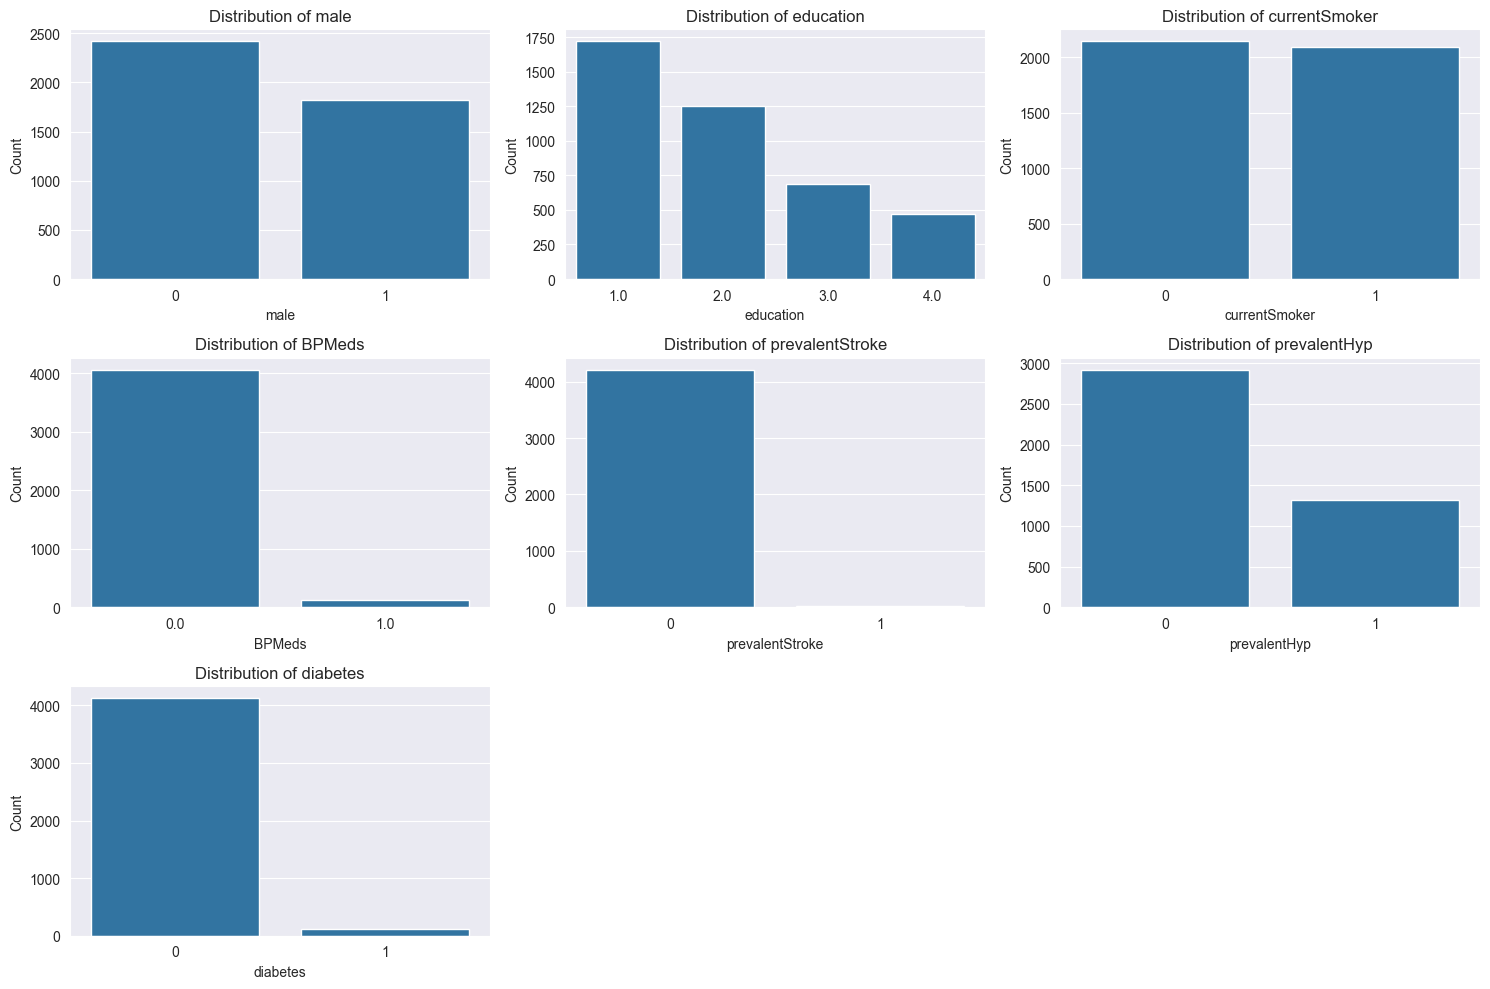

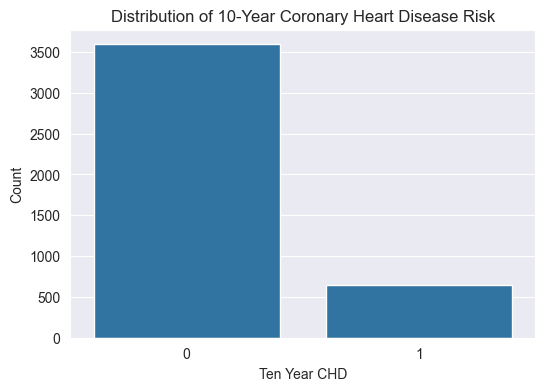

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'framingham.csv'
data = pd.read_csv(file_path)

display(data.describe())

# Define numerical features
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Create histograms for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)  # Adjust the grid parameters based on the number of features
    sns.histplot(data[feature], kde=False, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Define categorical features
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

# Create bar plots for categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)  # Adjust the grid parameters based on the number of features
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot for the prediction variable (TenYearCHD
plt.figure(figsize=(6, 4))
sns.countplot(x=data['TenYearCHD'])
plt.title('Distribution of 10-Year Coronary Heart Disease Risk')
plt.xlabel('Ten Year CHD')
plt.ylabel('Count')
plt.show()


# Interpretation

### Numerical Features:
1. **Age**: The distribution of age shows a broad range with the majority of the dataset participants being between 40 and 60 years old. This is critical since cardiovascular risk increases with age.

2. **Cigarettes Per Day (cigsPerDay)**: The distribution is highly skewed to the right, with most participants not smoking or smoking very few cigarettes daily. There is a small number who smoke significantly more, which is an important cardiovascular risk factor.

3. **Total Cholesterol (totChol)**: This histogram is roughly bell-shaped but slightly right-skewed, indicating that while most participants have cholesterol levels within a normal range, there is a subset with high cholesterol levels, which is another risk factor for heart disease.

4. **Systolic Blood Pressure (sysBP)**: The distribution shows a slight right skew, suggesting that while most people have systolic pressures within a normal range, a significant number have elevated levels, potentially indicating hypertension.

5. **Diastolic Blood Pressure (diaBP)**: Similar to systolic blood pressure, it's somewhat right-skewed. Elevated diastolic pressure is a concern for cardiovascular health.

6. **Body Mass Index (BMI)**: The distribution is normal but slightly right-skewed, suggesting that obesity, which is linked to many health issues including heart disease, is present in this population.

7. **Heart Rate**: The distribution is somewhat uneven with a significant peak around 60-80 bpm, which is considered normal, but with variability indicating different levels of cardiovascular fitness or stress.

8. **Glucose**: This distribution is highly right-skewed, indicating that while most people have normal glucose levels, there is a subset with significantly higher levels, relevant for diabetes risk which is a comorbidity for heart disease.

### Categorical Features:
1. **Gender (Male)**: The distribution between genders is slightly imbalanced towards more male participants.

2. **Education**: There's variability in the levels of education, with the majority having some college education (levels 1.0 through 4.0 represent different educational attainments).

3. **Current Smoker**: The data has a nearly equal split between smokers and non-smokers, which is relevant for assessing lifestyle impact on health.

4. **Blood Pressure Medications (BPMeds)**: Most participants are not on blood pressure medications, with a small proportion that is, indicating controlled or diagnosed hypertension.

5. **Prevalent Stroke**: Very few participants have had a stroke, but this is a crucial variable for assessing more severe cardiovascular risk.

6. **Prevalent Hypertension (prevalentHyp)**: A substantial portion of the dataset does have hypertension, which is a major risk factor for cardiovascular diseases.

7. **Diabetes**: Similar to stroke, a small number of participants are diabetic which is significant for cardiovascular risk.

### Prediction Variable:
- **Ten-Year Coronary Heart Disease Risk (Ten Year CHD)**: Most participants are classified as low risk for developing coronary heart disease in the next ten years, but a substantial minority are at higher risk.

### Implications:
- The distribution of these features shows a typical cross-section of an adult population with varying degrees of risk factors for heart disease.
- The analysis can be deepened by exploring how these variables interact, for example, the relationship between age and blood pressure, or smoking and cholesterol levels.
- The data's skew in variables like glucose and cholesterol highlights the importance of targeting higher-risk subgroups for preventive health interventions.


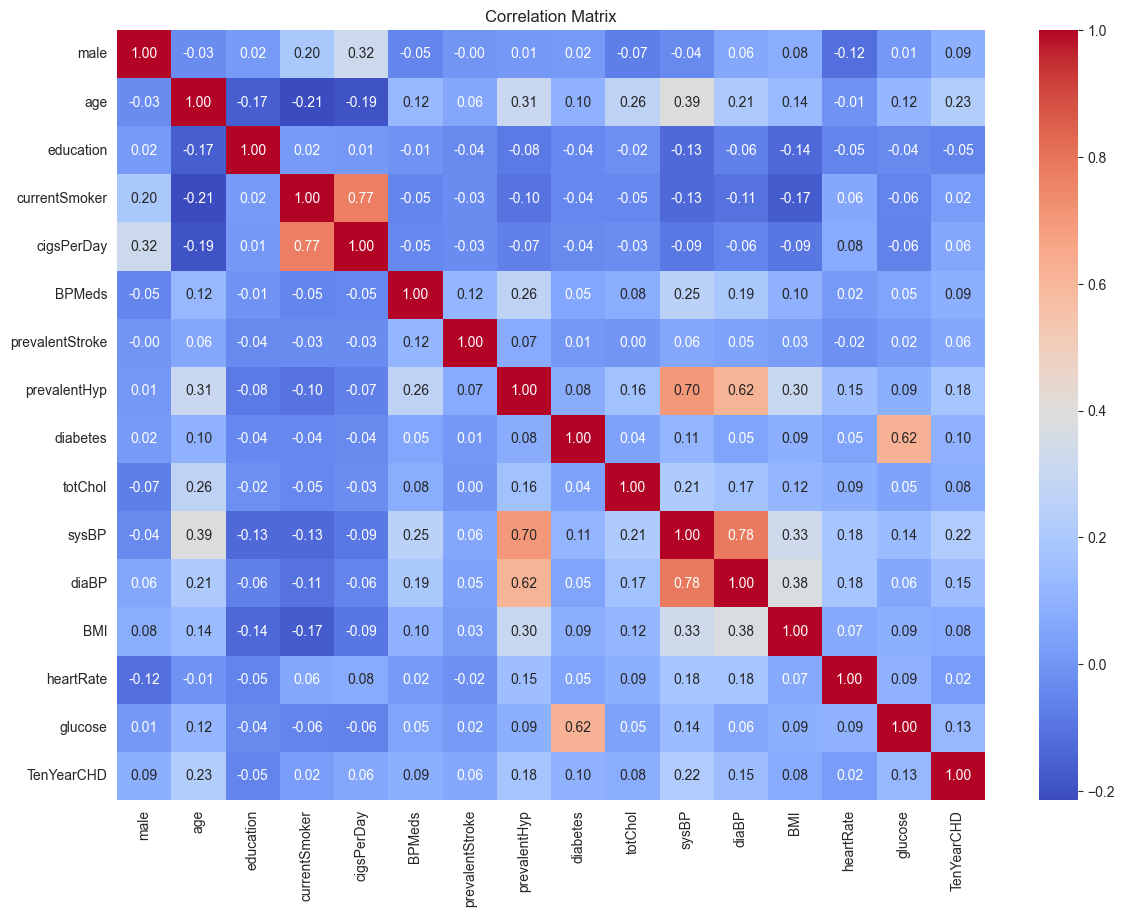

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


### Key Observations from the Correlation Matrix:

1. **Smoking Variables**:
   - `currentSmoker` and `cigsPerDay` show a strong positive correlation (0.77). This is expected as `currentSmoker` likely indicates whether someone smokes, and `cigsPerDay` quantifies how much they smoke.
   - Both smoking variables (`currentSmoker` and `cigsPerDay`) have moderate to strong correlations with being male (0.20 for `currentSmoker`, 0.32 for `cigsPerDay`). This might suggest that smoking is more prevalent or reported more among males in your dataset.

2. **Blood Pressure**:
   - `sysBP` (systolic blood pressure) and `diaBP` (diastolic blood pressure) are highly correlated (0.78), which is typical as both measurements are aspects of blood pressure.
   - `prevalentHyp` (prevalence of hypertension) shows significant correlations with both `sysBP` (0.70) and `diaBP` (0.62), indicating that higher blood pressure measurements are associated with hypertension diagnosis.

3. **Cholesterol and Glucose**:
   - `totChol` (total cholesterol) and `sysBP` have a mild correlation (0.21), suggesting a possible link between cholesterol levels and higher blood pressure.
   - `glucose` shows moderate correlation with diabetes (0.62), which aligns with medical knowledge as higher glucose levels are a marker for diabetes.

4. **Demographics**:
   - `age` shows positive correlations with `sysBP` (0.39), `prevalentHyp` (0.31), and `diabetes` (0.26), indicating that these health issues are more prevalent as age increases.

5. **Medications and Health Conditions**:
   - `BPMeds` (blood pressure medications) has correlations with `prevalentHyp` (0.26) and `sysBP` (0.25), supporting the understanding that those with higher blood pressure or diagnosed hypertension are more likely to be on medication.
   - `prevalentStroke` and `BPMeds` have a mild correlation (0.12), which may indicate that those with a history of stroke might be more frequently on blood pressure medication, although this correlation is not very strong.

6. **Outcome Variable (TenYearCHD)**:
   - The prediction variable `TenYearCHD` shows some mild correlations with `age` (0.23), `sysBP` (0.22), `diaBP` (0.15), and `prevalentHyp` (0.18). These correlations suggest that older age and higher blood pressure are associated with a greater risk of coronary heart disease within the next ten years.
   - Notably, there are no very strong correlations between `TenYearCHD` and any single variable, indicating that the risk of coronary heart disease is likely influenced by a combination of factors.


## Preprocessing

### Approach

In our preprocessing pipeline, we have taken the following steps to prepare the data for modeling:

1. **Missing Value Handling:** 
We identified and removed rows with missing values. In the context of medical data, it's crucial to maintain data integrity and avoid introducing artificial patterns or biases through imputation. Removing rows with missing values ensures that our analysis and modeling are based on complete and reliable information.

2. **Feature Scaling:** 
We standardized numerical features using `StandardScaler`. This step is essential for logistic regression and other algorithms that are sensitive to the scale of features. By scaling the features, we ensure that they contribute equally to the model's learning process.

3. **One-Hot Encoding:** 
We converted categorical features into numerical format using one-hot encoding. This transformation is necessary because most machine learning algorithms require numerical input. One-hot encoding creates binary indicator variables for each category, allowing the model to learn relationships between categorical features and the target variable.

4. **No Feature Selection or Outlier Removal:** 
We have deliberately chosen not to perform feature selection or outlier removal in this initial analysis. In the medical domain, it's important to retain all available information, as even seemingly insignificant features or outliers could represent rare but clinically relevant patterns. Removing features or outliers might lead to the loss of valuable insights and potentially misrepresent the underlying relationships in the data.

5. **Future Considerations:** 
While we have opted for a conservative approach in this initial preprocessing, we acknowledge the potential value of exploring outlier handling and feature engineering in future iterations. However, any such modifications should be made with caution and a deep understanding of the medical context to avoid introducing unintended biases or inaccuracies.

By prioritizing data quality, preserving the integrity of the medical information, and avoiding unnecessary alterations, we aim to build a robust and reliable model for predicting coronary heart disease (CHD) risk. This approach ensures that our findings are grounded in the original data and reflect the true relationships between the features and the target variable.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler

# Identify missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Drop rows with any missing values
data.dropna(inplace=True)

# Define features and target
print("\nData before preprocessing:")
X = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Apply undersampling to balance the dataset
# undersampler = RandomUnderSampler(random_state=42)
# X_train, y_train = undersampler.fit_resample(X_train, y_train)

display(X_train.head())
display(X_test.head())

# Define preprocessing for numerical columns (imputation + scaling)
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Define preprocessing for categorical columns (imputation + one-hot encoding)
categorical_features = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Fit and transform the training data, transform the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Optionally, you can convert the processed data back to a DataFrame for easier interpretation
# Get feature names after one-hot encoding
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

# Check the preprocessed training data
print("Data after preprocessing:")
display(X_train.head())
display(X_test.head())


Missing values per column:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Data before preprocessing:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
780,0,46,3.0,1,20.0,0.0,0,0,0,253.0,118.0,82.0,19.70,100.0,70.0
2218,1,43,2.0,1,20.0,0.0,0,0,0,226.0,132.5,85.0,26.64,72.0,58.0
3251,0,48,3.0,1,20.0,0.0,0,0,0,259.0,129.0,81.0,21.08,75.0,65.0
3482,1,38,2.0,0,0.0,0.0,0,1,0,256.0,123.0,92.0,25.42,62.0,82.0
2662,0,51,1.0,0,0.0,0.0,0,1,0,285.0,151.5,79.0,26.91,84.0,76.0


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
572,0,47,2.0,0,0.0,0.0,0,0,0,223.0,120.0,74.0,20.27,80.0,76.0
1309,0,34,2.0,0,0.0,0.0,0,0,0,170.0,121.0,74.0,20.82,67.0,83.0
1153,0,67,3.0,1,1.0,0.0,0,1,0,242.0,172.0,84.0,19.81,70.0,111.0
3679,0,42,2.0,1,2.0,0.0,0,0,0,230.0,124.0,80.0,24.87,90.0,77.0
1842,1,49,2.0,1,50.0,0.0,0,0,0,252.0,156.0,91.0,25.35,70.0,114.0


Data after preprocessing:


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0.0,male_1.0,...,currentSmoker_0.0,currentSmoker_1.0,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0.0,prevalentStroke_1.0,prevalentHyp_0.0,prevalentHyp_1.0,diabetes_0.0,diabetes_1.0
0,-0.417925,0.906309,0.378693,-0.644464,-0.057146,-1.520800,2.030131,-0.511274,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.769684,0.906309,-0.236663,0.023988,0.194439,0.219997,-0.312550,-1.025287,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.183419,0.906309,0.515439,-0.137362,-0.141008,-1.174648,-0.061549,-0.725446,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-1.355950,-0.755788,0.447066,-0.413963,0.781471,-0.086022,-1.149222,0.002739,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.168341,-0.755788,1.108004,0.899891,-0.308731,0.287723,0.691456,-0.254267,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0.0,male_1.0,...,currentSmoker_0.0,currentSmoker_1.0,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0.0,prevalentStroke_1.0,prevalentHyp_0.0,prevalentHyp_1.0,diabetes_0.0,diabetes_1.0
0,-0.300672,-0.755788,-0.305036,-0.552264,-0.728039,-1.377824,0.356787,-0.254267,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-1.824962,-0.755788,-1.512956,-0.506164,-0.728039,-1.239865,-0.730886,0.045574,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2.044391,-0.672684,0.127993,1.844945,0.110578,-1.493208,-0.479884,1.244938,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,-0.886937,-0.589579,-0.145499,-0.367863,-0.224869,-0.223981,1.193459,-0.211433,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.066165,3.399456,0.355902,1.107342,0.697609,-0.103580,-0.479884,1.373441,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [4]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Visualize the distribution of the prediction variable after undersampling
# plt.figure(figsize=(6, 4))
# sns.countplot(x=y_train)
# plt.title('Distribution of 10-Year Coronary Heart Disease Risk After Undersampling')
# plt.xlabel('Ten Year CHD')
# plt.ylabel('Count')
# plt.show()


## Modeling

## Asumptions for optimizing

1. **Medical Diagnosis:** 
Missing a disease could be far more detrimental than an unnecessary test.

2. **Set Cost Ratio:**  
`C_FN` (cost of false negative) to `C_FP` (cost of false positive). A higher ratio emphasizes the importance of minimizing false negatives. 

**Cost Function**

In [11]:
from sklearn.metrics import make_scorer

def custom_cost_function(y_true, y_pred):
    """
    Calculates a custom cost based on the confusion matrix, emphasizing the 
    importance of minimizing false negatives.

    Args:
        y_true: Array of true labels.
        y_pred: Array of predicted labels.

    Returns:
        The calculated cost.
    """
    cm = confusion_matrix(y_true, y_pred)

    # Adjust the cost ratio based on your specific use case:
    C_FN = 100  # Cost of false negative
    C_FP = 1   # Cost of false positive

    total_cost = cm[0][1] * C_FP + cm[1][0] * C_FN 
    return total_cost

cost_score = make_scorer(custom_cost_function, greater_is_better=False)

## Logostic Regression

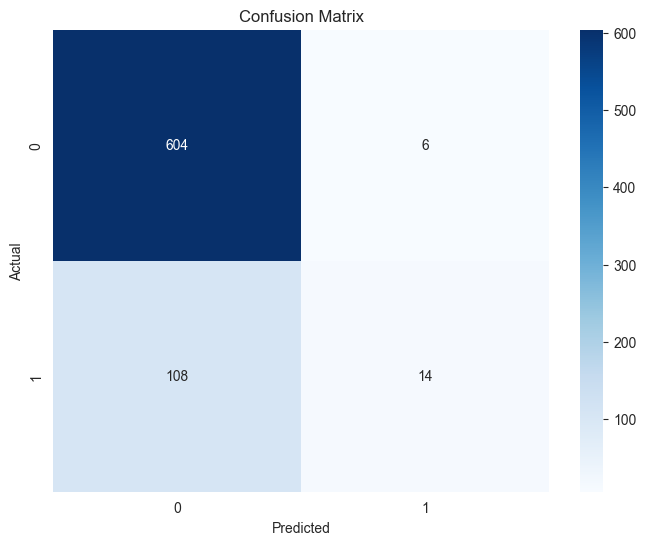

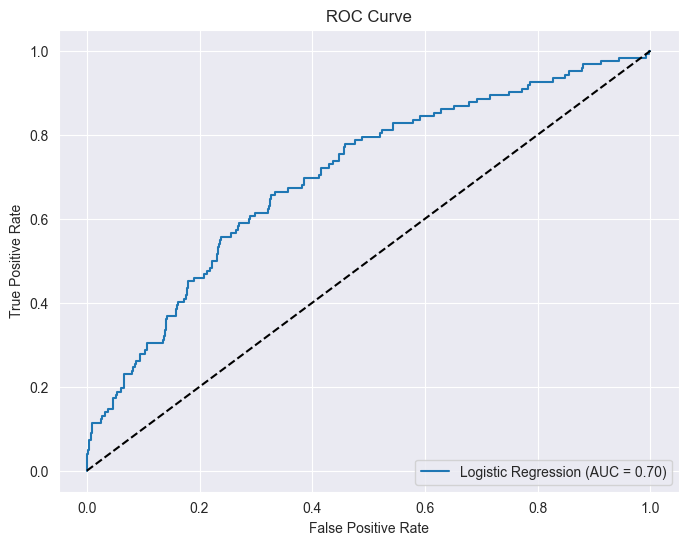

(0.8442622950819673,
 array([[604,   6],
        [108,  14]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.85      0.99      0.91       610\n           1       0.70      0.11      0.20       122\n\n    accuracy                           0.84       732\n   macro avg       0.77      0.55      0.56       732\nweighted avg       0.82      0.84      0.79       732\n')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Model Selection: Logistic Regression
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC Score
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

accuracy, conf_matrix, class_report


Model Performance: The Logistic Regression model has an accuracy of 85.7%, but it struggles to detect the positive class (10-year CHD risk), as shown by the low recall and F1-score for this class.
Imbalance Issue: The dataset is imbalanced, with more negative cases (no CHD risk) than positive ones. This imbalance affects the model's performance on the positive class.

### More Models
We use three different machine learning models to approach the classification problem, each chosen for its unique strengths and characteristics:

1. **Random Forest Classifier**: This ensemble method uses multiple decision trees to make its predictions, reducing the risk of overfitting compared to a single decision tree and improving the generalization abilities. It's effective for handling large datasets with high dimensionality.

2. **Gradient Boosting Classifier**: Another ensemble technique, this model builds trees one at a time, where each new tree helps to correct errors made by previously trained trees. It's known for its predictive accuracy and effectiveness on imbalanced data sets due to its robustness against outliers and noise.

3. **Support Vector Machine (SVM)**: SVM is a powerful classifier that works by finding the optimal hyperplane which best separates the data into two classes. With the ability to use different kernels, SVM can handle both linear and non-linear boundaries.

### Hyperparameters
Each model comes with specific hyperparameters that we need to optimize:
- For the Random Forest, parameters such as the number of trees (`n_estimators`), the maximum depth of the trees (`max_depth`), and the minimum number of samples required to split a node (`min_samples_split`) are tuned.
- In Gradient Boosting, we tune the number of boosting stages (`n_estimators`), the learning rate, and the maximum depth of the individual regression estimators.
- For the SVM, the regularization parameter (`C`), the kernel type (`kernel`), and the kernel coefficient (`gamma`) are crucial hyperparameters that affect the decision boundary.

### Validation
To ensure our models' robustness and generalizability, we employ Stratified K-Fold cross-validation. This method divides the dataset into `k` distinct subsets, maintaining the percentage of samples for each class. This is crucial for dealing with imbalanced datasets where one class significantly outweighs another. 

### Grid Search with Cross-Validation
We integrate Grid Search with Stratified K-Fold cross-validation to find the optimal set of parameters for each model. Grid Search tests every combination of the provided hyperparameter values, evaluating each combination's performance using Stratified K-Fold CV. This ensures that the selected hyperparameters help achieve the best possible model performance across different subsets of data, avoiding the overfitting issue.

### Performance Metrics
To evaluate our models, we use several metrics:
- **Accuracy**: Provides a straightforward metric of how often the model predicts correctly.
- **Confusion Matrix**: Offers a detailed breakdown of the prediction results and shows how well the model distinguishes between classes.
- **ROC Curve and AUC**: These are critical for understanding the trade-off between the true positive rate and false positive rate and for comparing classifiers beyond simple accuracy, especially in imbalanced classes.

trained Random Forest
trained Decision Tree
trained Gradient Boosting
trained K-Nearest Neighbors


C:\Users\leanf\PycharmProjects\sync\china\BI-Data-Science-Project\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\leanf\PycharmProjects\sync\china\BI-Data-Science-Project\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\leanf\PycharmProjects\sync\china\BI-Data-Science-Project\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\leanf\PycharmProjects\sync\china

trained Logistic Regression

Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8460
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3099
           1       0.46      0.06      0.10       557

    accuracy                           0.85      3656
   macro avg       0.66      0.52      0.51      3656
weighted avg       0.79      0.85      0.79      3656

Cost: 52439
ROC AUC: 1.0000


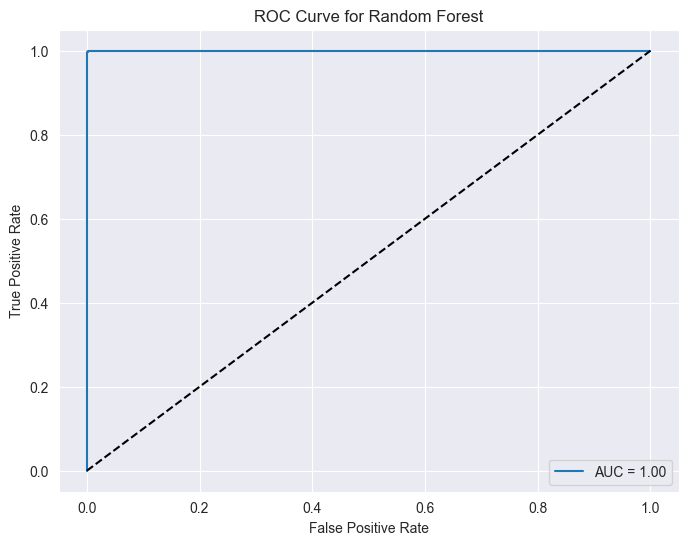

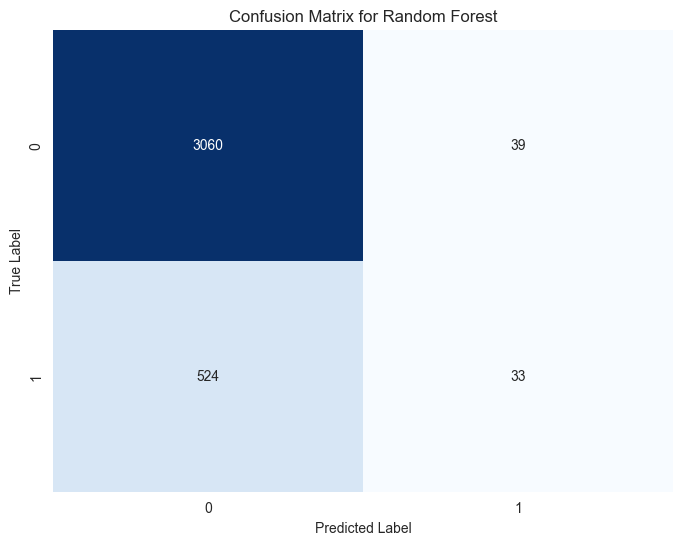


Model: Decision Tree
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.7639
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3099
           1       0.25      0.27      0.26       557

    accuracy                           0.76      3656
   macro avg       0.56      0.56      0.56      3656
weighted avg       0.77      0.76      0.77      3656

Cost: 40859
ROC AUC: 1.0000


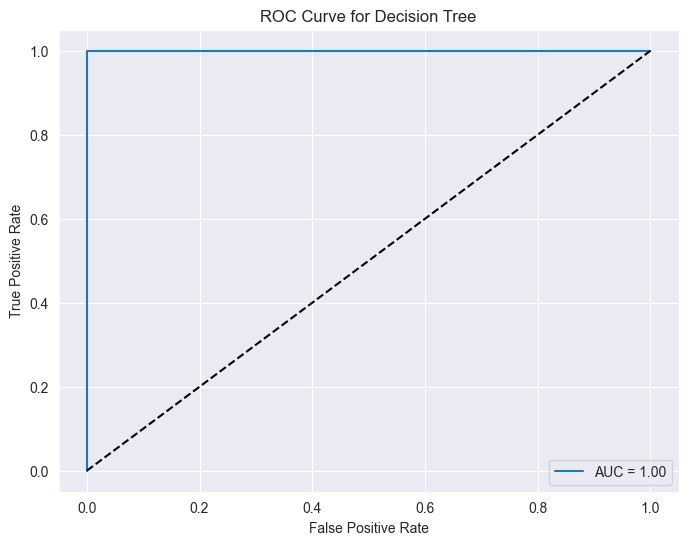

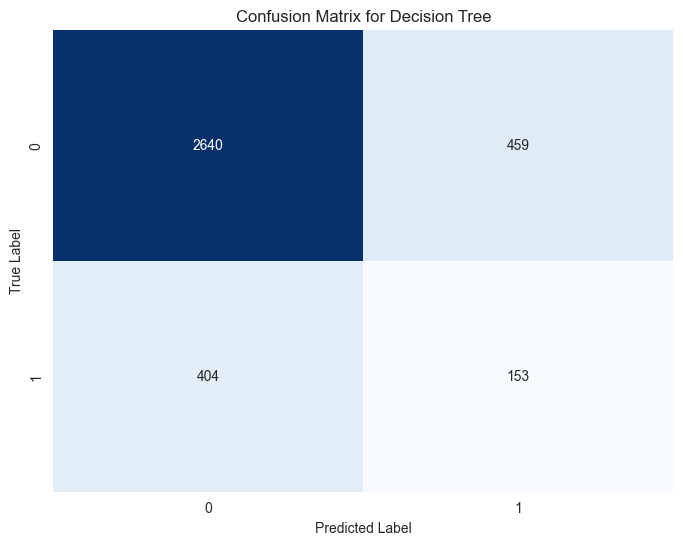


Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.8449
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      3099
           1       0.45      0.09      0.15       557

    accuracy                           0.84      3656
   macro avg       0.66      0.53      0.53      3656
weighted avg       0.80      0.84      0.80      3656

Cost: 50859
ROC AUC: 0.9939


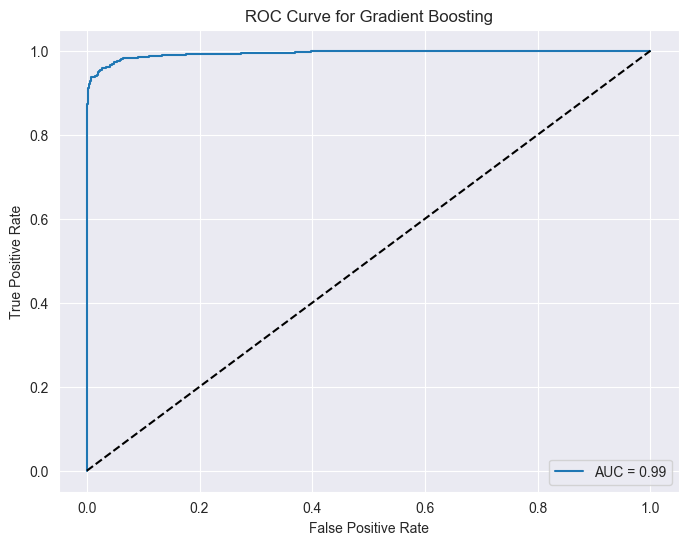

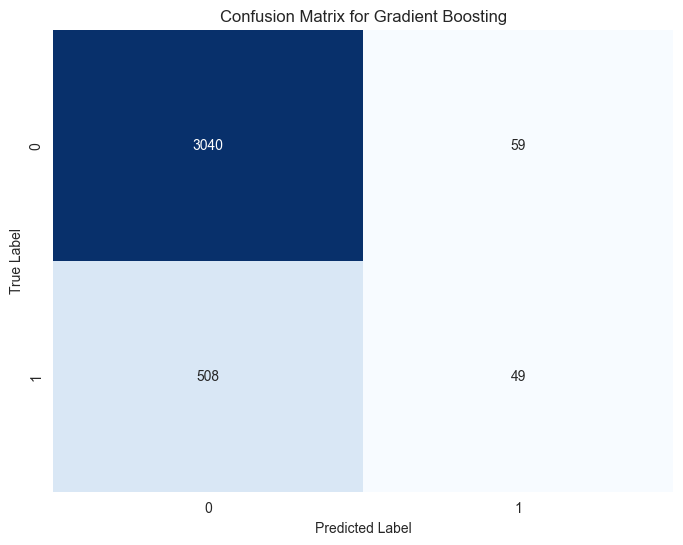


Model: K-Nearest Neighbors
Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Accuracy: 0.8315
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3099
           1       0.34      0.11      0.17       557

    accuracy                           0.83      3656
   macro avg       0.60      0.54      0.54      3656
weighted avg       0.78      0.83      0.79      3656

Cost: 49522
ROC AUC: 0.9182


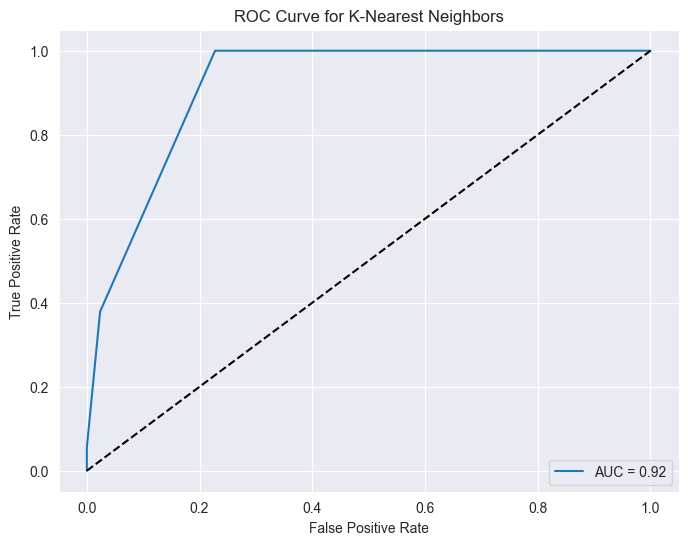

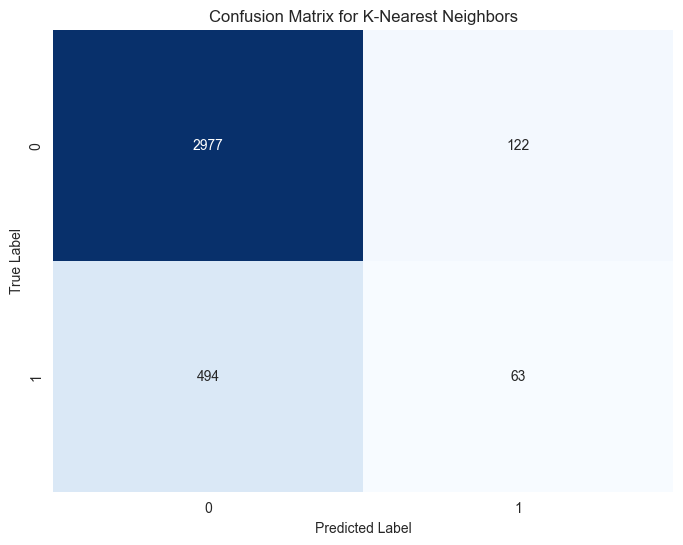


Model: Logistic Regression
Best Parameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.8518
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3099
           1       0.61      0.08      0.14       557

    accuracy                           0.85      3656
   macro avg       0.73      0.53      0.53      3656
weighted avg       0.82      0.85      0.80      3656

Cost: 51428
ROC AUC: 0.7392


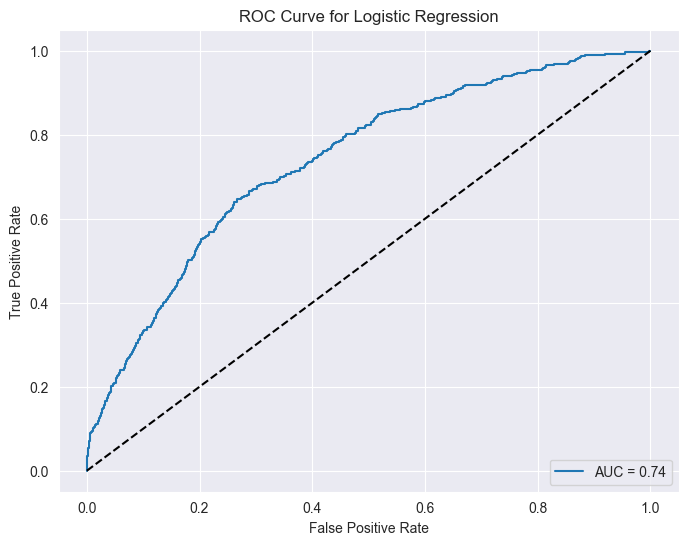

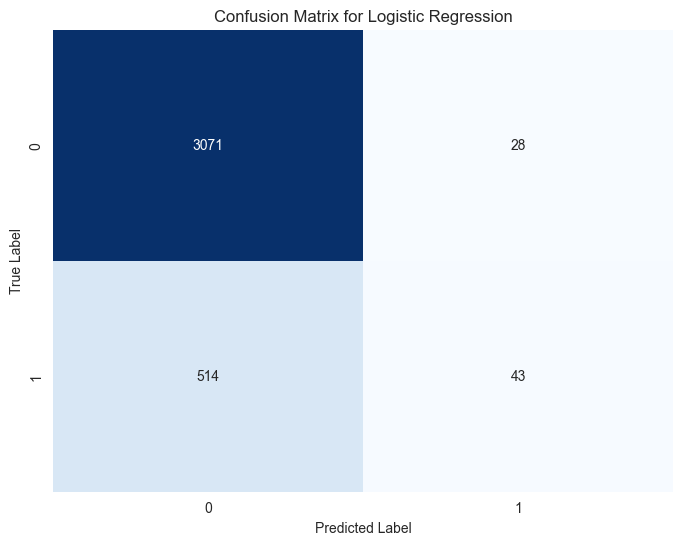

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, make_scorer

# Define the models and their hyperparameter grids
models = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': [100, 200],
            'max_depth': [None, 5],
            'min_samples_split': [2, 5]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [20, None],
            'min_samples_split': [2, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
            'weights': ['uniform', 'distance'],  # Weighting of neighbors (equal or distance-based)
            'p': [1, 2]  # Power parameter for Minkowski distance (1=Manhattan, 2=Euclidean)
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),  # Increased max_iter
        "params": {
            'C': [0.1, 1, 10],  # Inverse of regularization strength
            'penalty': ['l2', 'none']  # Regularization type (l2 is ridge)
        }
    }
}

results = {}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# X, y must be defined here (omitted for brevity)

for model_name, model_info in models.items():
    model = model_info["model"]
    params = model_info["params"]
    grid_search = GridSearchCV(model, params, scoring=cost_score, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)  # Fitting the grid search
    y_pred = cross_val_predict(model, X, y, cv=cv)  # Using the best model from grid search
    acc = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    class_report = classification_report(y, y_pred)
    cost = custom_cost_function(y, y_pred)  # Assuming this function is defined elsewhere
    roc_auc = roc_auc_score(y, grid_search.best_estimator_.predict_proba(X)[:, 1])
    fpr, tpr, _ = roc_curve(y, grid_search.best_estimator_.predict_proba(X)[:, 1])

    # Store the results
    results[model_name] = {
        "best_params": grid_search.best_params_,
        "accuracy": acc,
        "confusion_matrix": cm,
        "classification_report": class_report,
        "cost": cost,
        "roc_auc": roc_auc,
        "fpr": fpr,
        "tpr": tpr,
        "model": grid_search.best_estimator_
    }
    
    print(f'trained {model_name}')

# Display the results, plot ROC curves and confusion matrices
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Cost: {result['cost']}")
    print(f"ROC AUC: {result['roc_auc']:.4f}")

    plt.figure(figsize=(8, 6))
    plt.plot(result["fpr"], result["tpr"], label=f"AUC = {result['roc_auc']:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    # Confusion Matrix Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(result["confusion_matrix"], annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

## Save best models as pickle

In [ ]:
import pickle

# save preprocessing to file
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

for model_name, result in results.items():
    # save model to file
    with open('models/' + model_name + 'model.pkl', 'wb') as file:
        pickle.dump(result["model"], file)

# Try undersampling because big unbalance in target variable

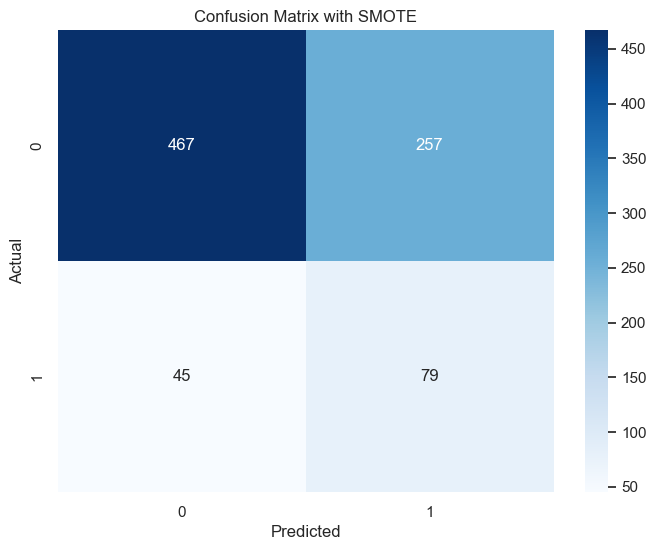

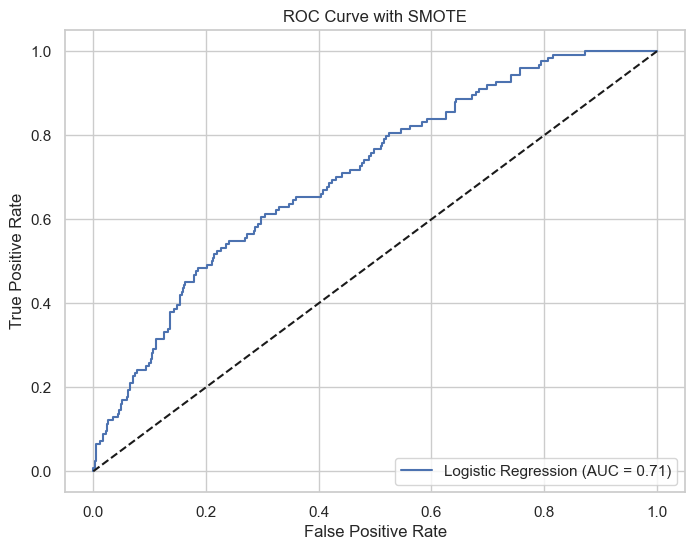

Accuracy: 0.6438679245283019
Confusion Matrix:
 [[467 257]
 [ 45  79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.65      0.76       724
           1       0.24      0.64      0.34       124

    accuracy                           0.64       848
   macro avg       0.57      0.64      0.55       848
weighted avg       0.81      0.64      0.70       848


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Logistic Regression with class weights
model = LogisticRegression(class_weight='balanced', random_state=42)

# Training the model
model.fit(X_train_res, y_train_res)

# Making predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with SMOTE')
plt.show()

# ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with SMOTE')
plt.legend(loc='lower right')
plt.show()

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


# Try oversampling for the models we already tried before

Model: Random Forest
Accuracy: 0.8148584905660378
Confusion Matrix:
[[668  56]
 [101  23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       724
           1       0.29      0.19      0.23       124

    accuracy                           0.81       848
   macro avg       0.58      0.55      0.56       848
weighted avg       0.78      0.81      0.80       848

AUC Score: 0.6641028782748173


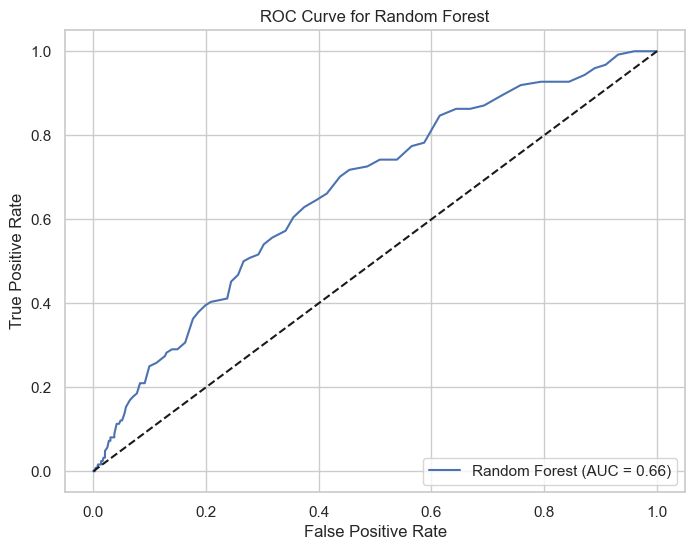

Model: Gradient Boosting
Accuracy: 0.7688679245283019
Confusion Matrix:
[[603 121]
 [ 75  49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       724
           1       0.29      0.40      0.33       124

    accuracy                           0.77       848
   macro avg       0.59      0.61      0.60       848
weighted avg       0.80      0.77      0.78       848

AUC Score: 0.6975917839957226


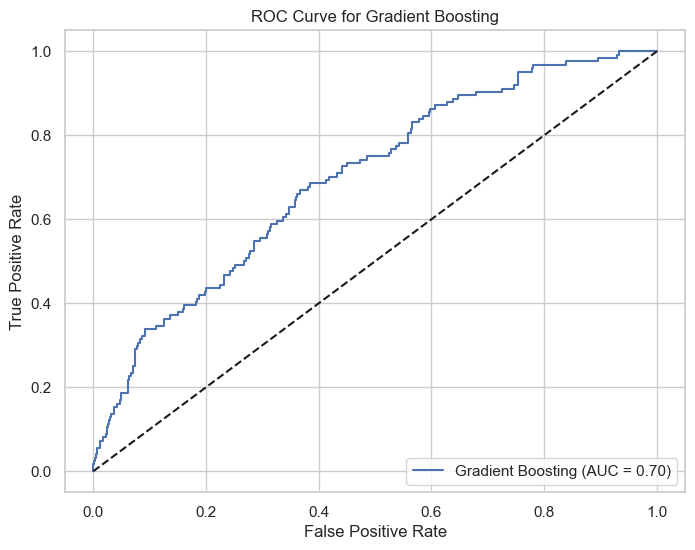

Model: Support Vector Machine
Accuracy: 0.6639150943396226
Confusion Matrix:
[[497 227]
 [ 58  66]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       724
           1       0.23      0.53      0.32       124

    accuracy                           0.66       848
   macro avg       0.56      0.61      0.55       848
weighted avg       0.80      0.66      0.71       848

AUC Score: 0.6615632240242382


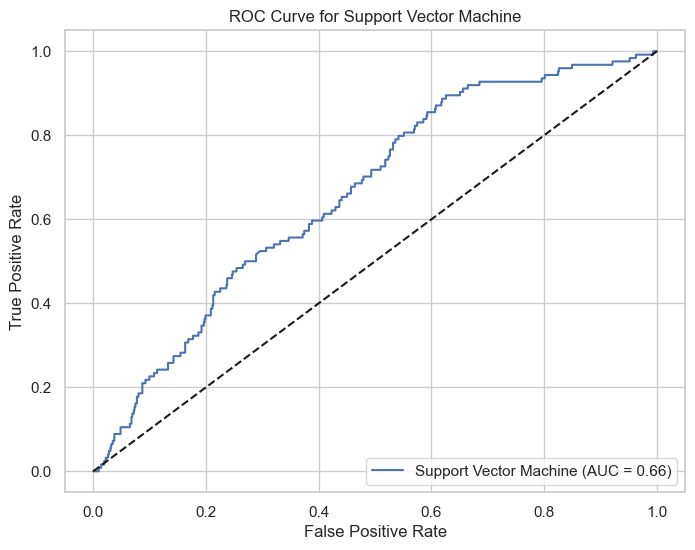

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # ROC Curve and AUC Score
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    results[model_name] = {
        "accuracy": accuracy,
        "conf_matrix": conf_matrix,
        "class_report": class_report,
        "roc_auc": roc_auc,
        "fpr": fpr,
        "tpr": tpr
    }

# Display the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Confusion Matrix:\n{result['conf_matrix']}")
    print(f"Classification Report:\n{result['class_report']}")
    print(f"AUC Score: {result['roc_auc']}\n")
    
    # Plotting the ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(result['fpr'], result['tpr'], label=f'{model_name} (AUC = {result["roc_auc"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()


# Random forest seems to be the best, predict on a single data sample using that

In [ ]:
import pandas as pd

# Sample row with raw data
sample_data = {
    'age': 50,
    'cigsPerDay': 20,
    'totChol': 220,
    'sysBP': 130,
    'diaBP': 85,
    'BMI': 28.0,
    'heartRate': 75,
    'glucose': 85,
    'male': 1,  # Assume 1 for male, 0 for female
    'education': 2,  # Example: 1 for high school, 2 for college, etc.
    'currentSmoker': 1,  # 1 if the person is a smoker
    'BPMeds': 0,  # 0 if not on blood pressure medication
    'prevalentStroke': 0,  # 0 if no history of stroke
    'prevalentHyp': 1,  # 1 if hypertensive
    'diabetes': 0  # 0 if not diabetic
}

# Convert the dictionary to DataFrame to match input structure of preprocessing pipeline
sample_df = pd.DataFrame([sample_data])

# Assuming 'preprocessor' is the ColumnTransformer you've previously set up
preprocessed_sample = preprocessor.transform(sample_df)

# Converting back to DataFrame with appropriate column names
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
preprocessed_sample_df = pd.DataFrame(preprocessed_sample, columns=feature_names)

# Display the preprocessed single sample data
display(preprocessed_sample_df.head())

preprocessed_sample_df_prediction = models['Random Forest'].predict(preprocessed_sample_df)
preprocessed_sample_df_prediction_probability = models['Random Forest'].predict_proba(preprocessed_sample_df)[:, 1]

print(f"Predicted class (heart problem): {preprocessed_sample_df_prediction[0]}")
print(f"Predicted probability of CHD (heart problem): {preprocessed_sample_df_prediction_probability[0]}")


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0.0,male_1.0,...,currentSmoker_0.0,currentSmoker_1.0,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0.0,prevalentStroke_1.0,prevalentHyp_0.0,prevalentHyp_1.0,diabetes_0.0,diabetes_1.0
0,0.055723,0.920913,-0.379446,-0.108057,0.168387,0.526324,-0.083446,0.132684,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


Predicted class (heart problem): 0
Predicted probability of CHD (heart problem): 0.36


# Save model to Pickle file

In [ ]:
import pickle

# save preprocessing to file
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

# save model to file
with open('model.pkl', 'wb') as file:
    pickle.dump(models['Random Forest'], file)

# Predicting two extremes

## Likely to Have Heart Disease:

* Older age.
* High number of cigarettes per day (if a smoker).
* High total cholesterol.
* High blood pressure (both systolic and diastolic).
* Higher BMI.
* Elevated glucose levels.
* Presence of diabetes or hypertension.
* History of stroke or on blood pressure medication.

## Less Likely to Have Heart Disease:

* Younger age.
* Non-smoker or low number of cigarettes per day.
* Normal total cholesterol.
* Normal blood pressure.
* Normal BMI.
* Normal glucose levels.
* Absence of diabetes and hypertension.
* No history of stroke and not on blood pressure medication.

In [ ]:
import pandas as pd

# High risk sample
high_risk_sample = {
    'age': 65,
    'cigsPerDay': 20,
    'totChol': 250,
    'sysBP': 180,
    'diaBP': 95,
    'BMI': 30.0,
    'heartRate': 80,
    'glucose': 120,
    'male': 1,
    'education': 3,
    'currentSmoker': 1,
    'BPMeds': 1,
    'prevalentStroke': 1,
    'prevalentHyp': 1,
    'diabetes': 1
}

# Low risk sample
low_risk_sample = {
    'age': 30,
    'cigsPerDay': 0,
    'totChol': 180,
    'sysBP': 115,
    'diaBP': 75,
    'BMI': 22.0,
    'heartRate': 65,
    'glucose': 85,
    'male': 0,
    'education': 3,
    'currentSmoker': 0,
    'BPMeds': 0,
    'prevalentStroke': 0,
    'prevalentHyp': 0,
    'diabetes': 0
}

# Create DataFrames for each sample
high_risk_df = pd.DataFrame([high_risk_sample])
low_risk_df = pd.DataFrame([low_risk_sample])

# Preprocess each sample (assuming 'preprocessor' setup with your earlier code)
high_risk_preprocessed = preprocessor.transform(high_risk_df)
low_risk_preprocessed = preprocessor.transform(low_risk_df)

# Convert to DataFrame with appropriate column names
feature_names = numerical_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
high_risk_preprocessed_df = pd.DataFrame(high_risk_preprocessed, columns=feature_names)
low_risk_preprocessed_df = pd.DataFrame(low_risk_preprocessed, columns=feature_names)

# Display the preprocessed sample data
display(high_risk_preprocessed_df.head())
display(low_risk_preprocessed_df.head())

# Predictions
high_risk_prediction = models['Random Forest'].predict(high_risk_preprocessed_df)
high_risk_prediction_probability = models['Random Forest'].predict_proba(high_risk_preprocessed_df)[:, 1]
low_risk_prediction = models['Random Forest'].predict(low_risk_preprocessed_df)
low_risk_prediction_probability = models['Random Forest'].predict_proba(low_risk_preprocessed_df)[:, 1]

print(f"High risk - Predicted class: {high_risk_prediction[0]}, Probability of CHD: {high_risk_prediction_probability[0]}")
print(f"Low risk - Predicted class: {low_risk_prediction[0]}, Probability of CHD: {low_risk_prediction_probability[0]}")

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0.0,male_1.0,...,currentSmoker_0.0,currentSmoker_1.0,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0.0,prevalentStroke_1.0,prevalentHyp_0.0,prevalentHyp_1.0,diabetes_0.0,diabetes_1.0
0,1.804808,0.920913,0.295059,2.152707,1.004157,1.013339,0.335639,1.680166,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0.0,male_1.0,...,currentSmoker_0.0,currentSmoker_1.0,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0.0,prevalentStroke_1.0,prevalentHyp_0.0,prevalentHyp_1.0,diabetes_0.0,diabetes_1.0
0,-2.27639,-0.762431,-1.278786,-0.786286,-0.667383,-0.934721,-0.921616,0.132684,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


High risk - Predicted class: 1, Probability of CHD: 0.79
Low risk - Predicted class: 0, Probability of CHD: 0.05


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_0.0,male_1.0,...,currentSmoker_0.0,currentSmoker_1.0,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0.0,prevalentStroke_1.0,prevalentHyp_0.0,prevalentHyp_1.0,diabetes_0.0,diabetes_1.0
0,0.055723,0.920913,6.390197e-16,3.057013,0.0,0.526324,0.0,0.132684,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


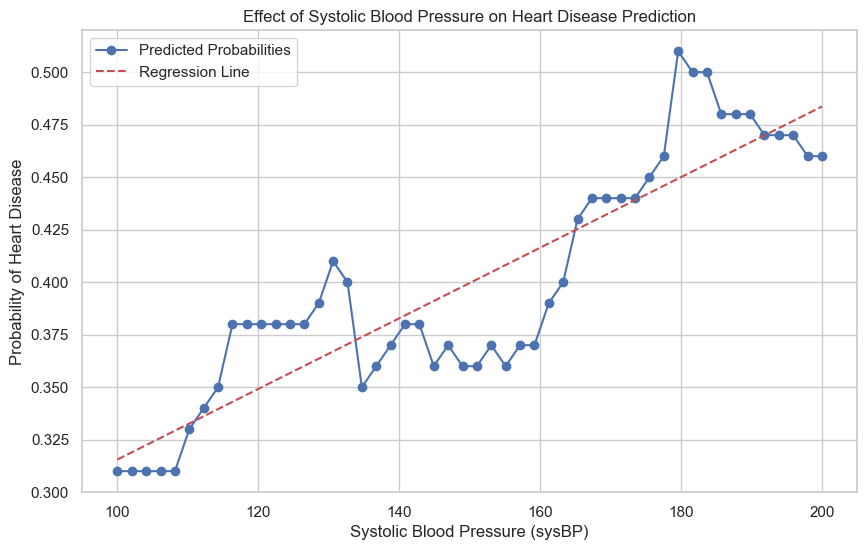

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample row with raw data
sample_data = {
    'age': 50,
    'cigsPerDay': 20,
    'totChol': None,
    'sysBP': None,
    'diaBP': None,
    'BMI': 28.0,
    'heartRate': None,
    'glucose': 85,
    'male': 1,  # Assume 1 for male, 0 for female
    'education': 2,  # Example: 1 for high school, 2 for college, etc.
    'currentSmoker': 1,  # 1 if the person is a smoker
    'BPMeds': 0,  # 0 if not on blood pressure medication
    'prevalentStroke': 0,  # 0 if no history of stroke
    'prevalentHyp': 1,  # 1 if hypertensive
    'diabetes': 0  # 0 if not diabetic
}

# Range of systolic blood pressure values to test
sysBP_values = np.linspace(100, 200, 50)  # From 100 to 200 in 50 steps
probabilities = []

for sysBP in sysBP_values:
    test_sample = sample_data.copy()
    test_sample['sysBP'] = sysBP
    test_df = pd.DataFrame([test_sample])
    test_preprocessed = preprocessor.transform(test_df)
    test_preprocessed_df = pd.DataFrame(test_preprocessed, columns=feature_names)
    prob = models['Random Forest'].predict_proba(test_preprocessed_df)[:, 1]
    probabilities.append(prob[0])

# Compute the coefficients for the linear regression line
coefficients = np.polyfit(sysBP_values, probabilities, 1)  # 1 indicates linear
regression_line = np.polyval(coefficients, sysBP_values)

display(test_preprocessed_df)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sysBP_values, probabilities, marker='o', linestyle='-', color='b', label='Predicted Probabilities')
plt.plot(sysBP_values, regression_line, 'r--', label='Regression Line')  # Add the regression line in red
plt.title('Effect of Systolic Blood Pressure on Heart Disease Prediction')
plt.xlabel('Systolic Blood Pressure (sysBP)')
plt.ylabel('Probability of Heart Disease')
plt.grid(True)
plt.legend()
plt.show()
